In [1]:
import statistics

import plots

import importlib
importlib.reload(plots)

from marketenvironment import MarketEnvironment
from simulation import run_episode

# RL-Environment

In [2]:
costs = [2, 3, 5, 7, 8]
sim_env = MarketEnvironment(num_agents=len(costs), costs=costs, sigma=0)
steps = 8000
print(f"Running simulation for {steps} steps...")
sim_env, round_info, q_snapshots, snap_steps = run_episode(sim_env=sim_env, max_steps=steps)

Running simulation for 8000 steps...


In [3]:
prices = [v["price"] for v in round_info.values()]
mean_price = statistics.mean(prices)

Plotting Q-Tables
Mean Price 5
RZ1 with cost 2 and sigma 0


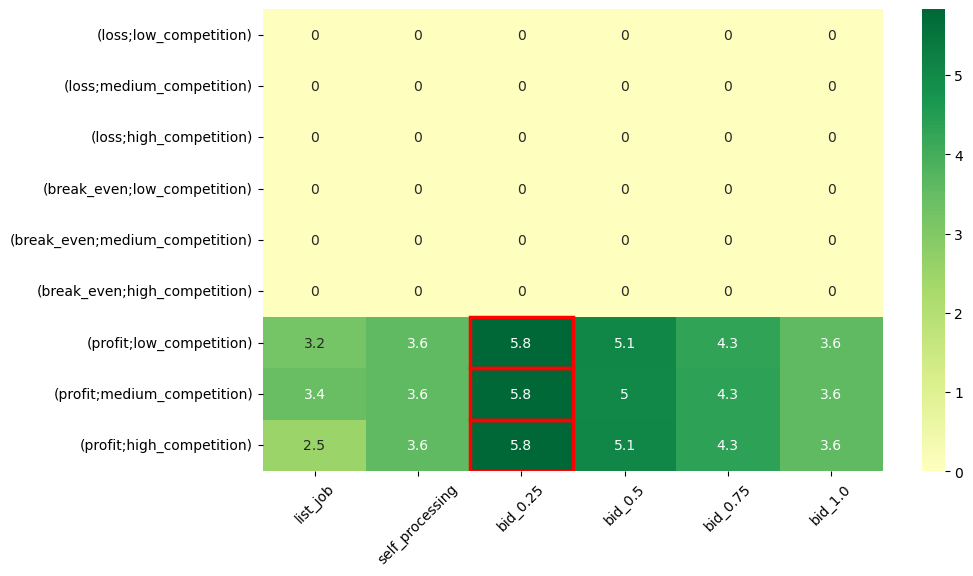

Mean Price 5
RZ2 with cost 3 and sigma 0


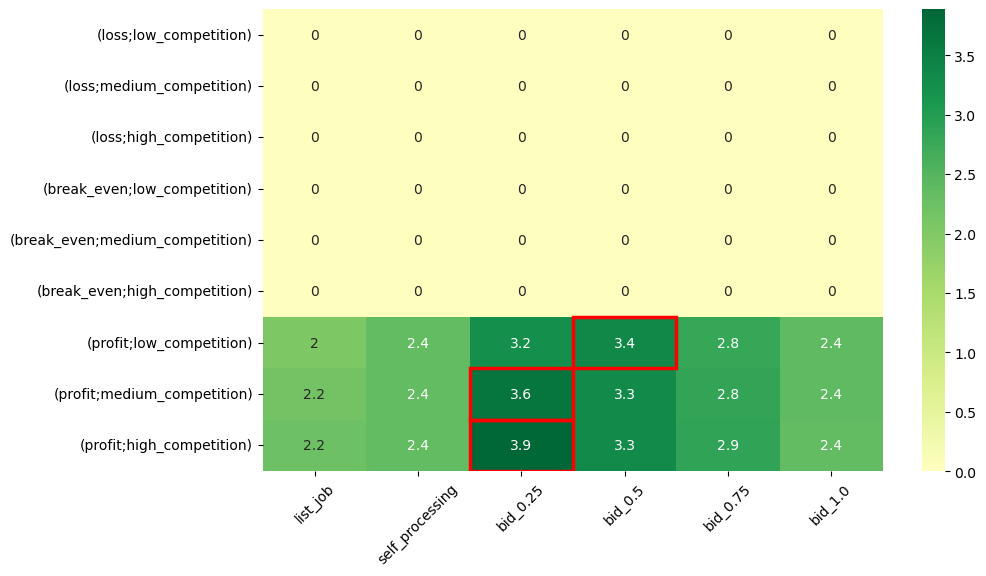

Mean Price 5
RZ3 with cost 5 and sigma 0


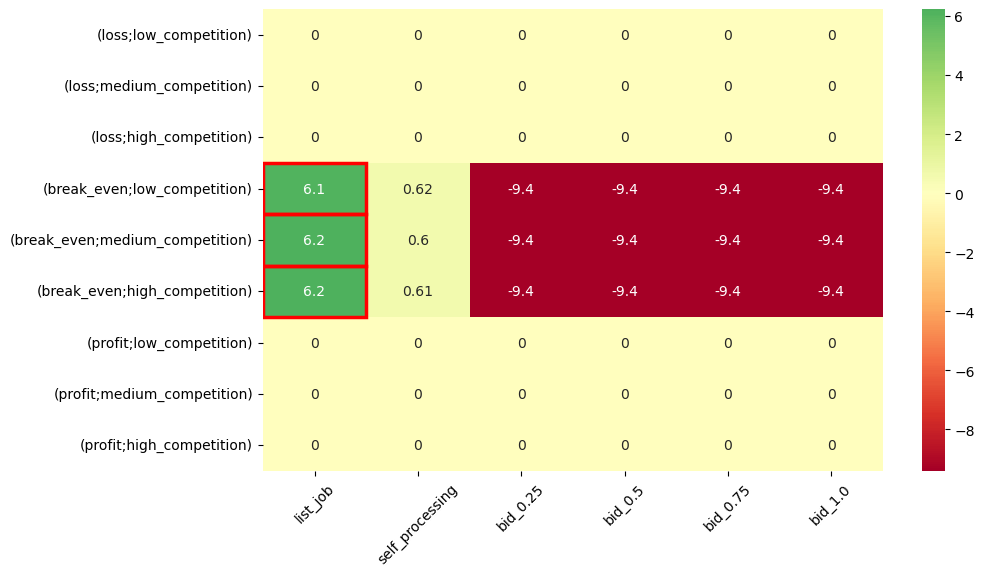

Mean Price 5
RZ4 with cost 7 and sigma 0


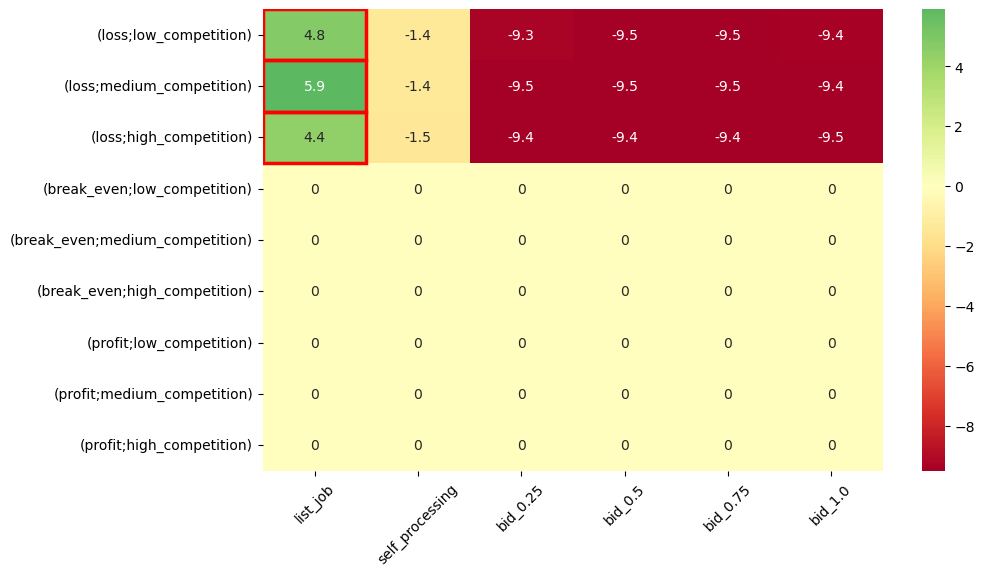

Mean Price 5
RZ5 with cost 8 and sigma 0


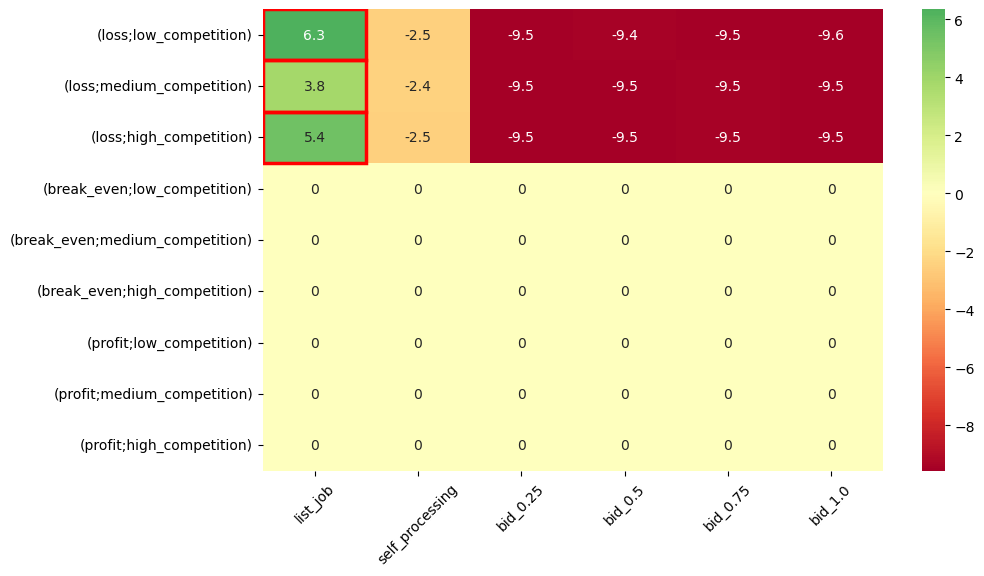

In [4]:
print("Plotting Q-Tables")
for agent in sim_env.agents.values():
    print(f"Mean Price {mean_price}")
    print(f"{agent.name} with cost {agent.mean_cost} and sigma {agent.sigma}")
    plots.plot_q_tables(agent)

Plotting Rewards


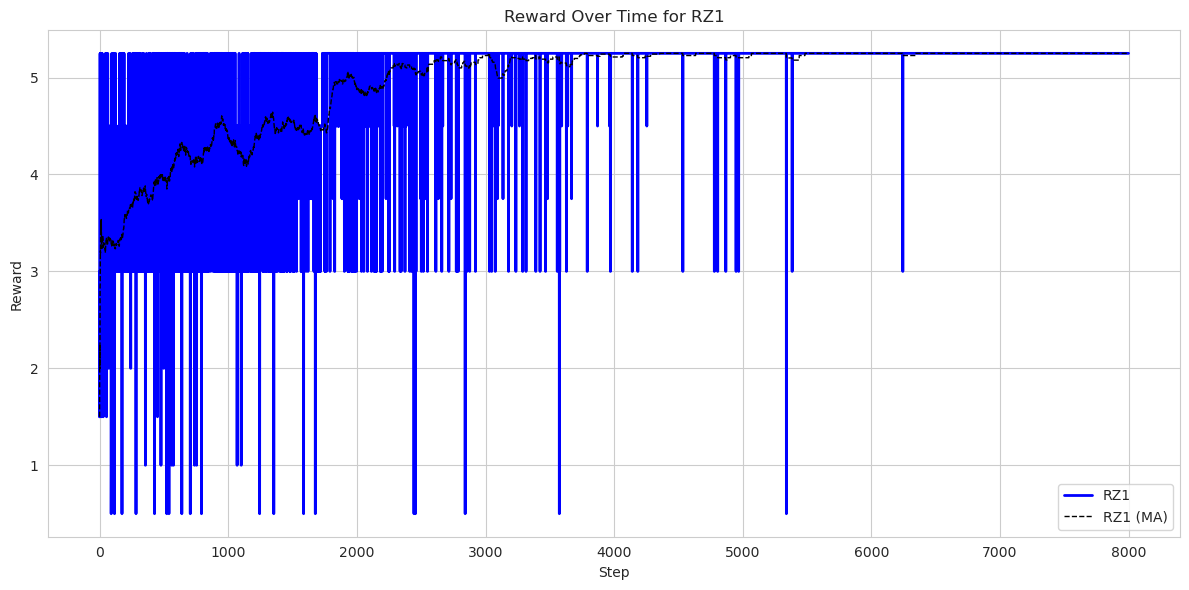

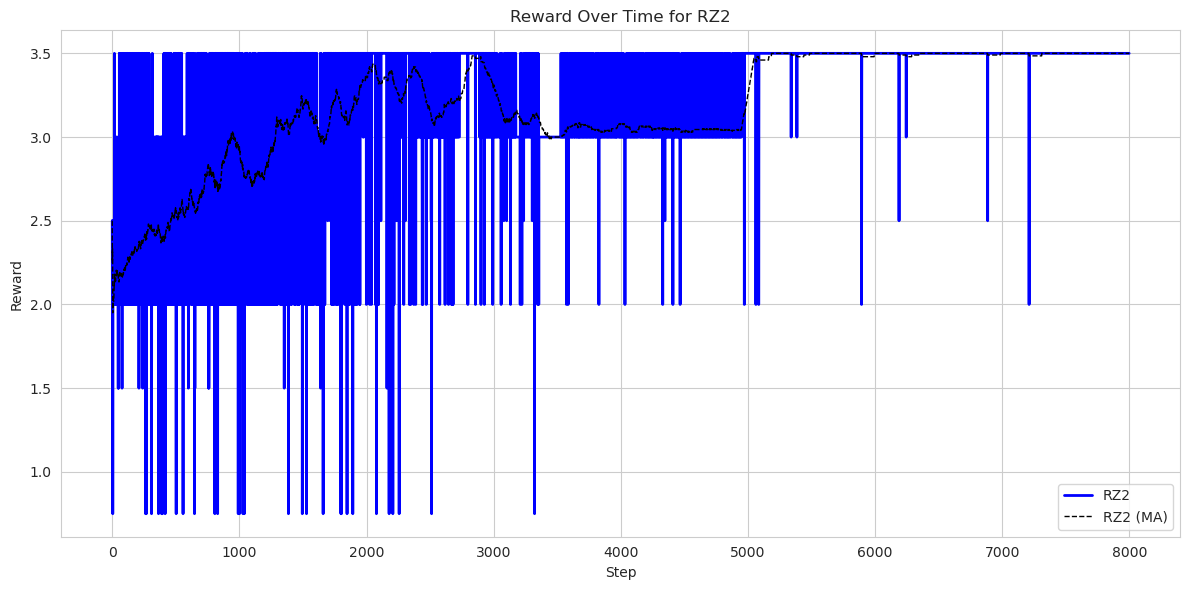

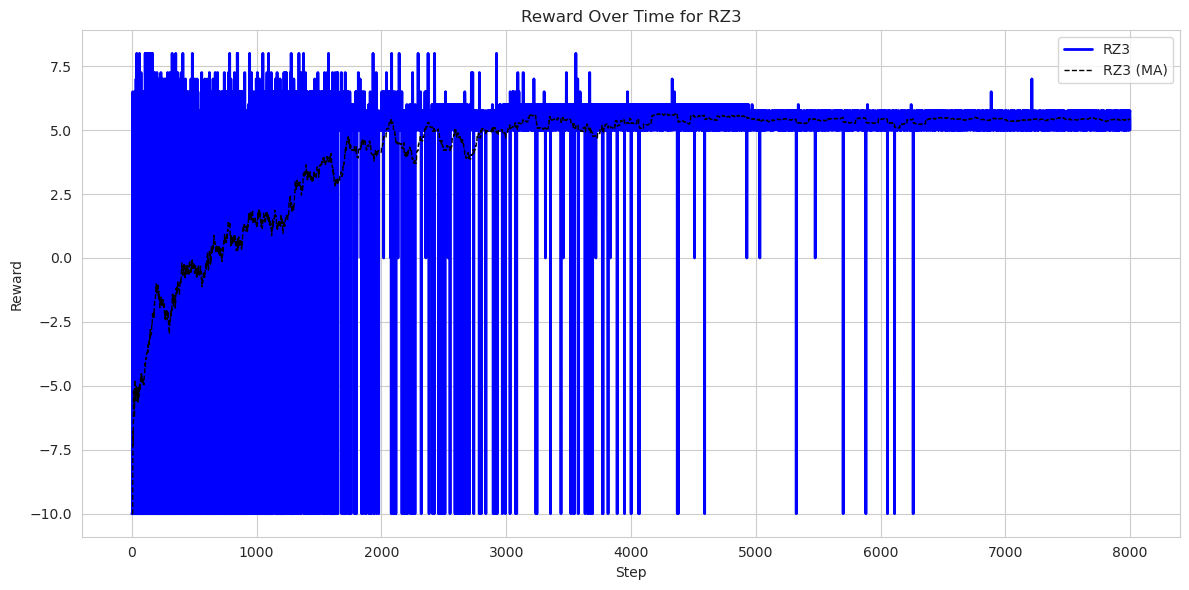

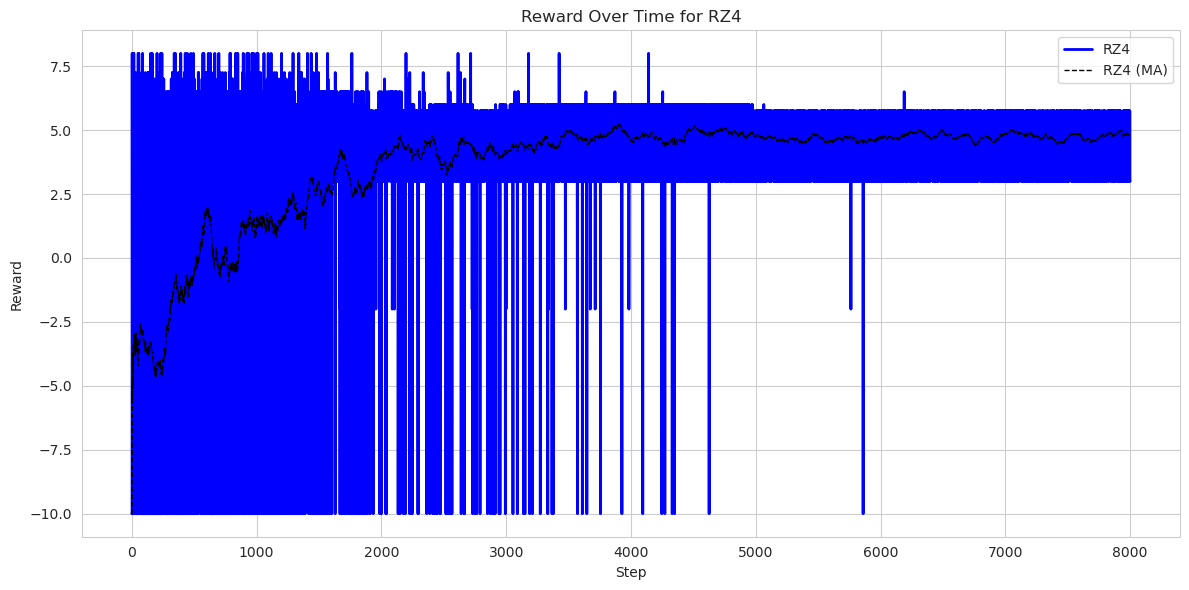

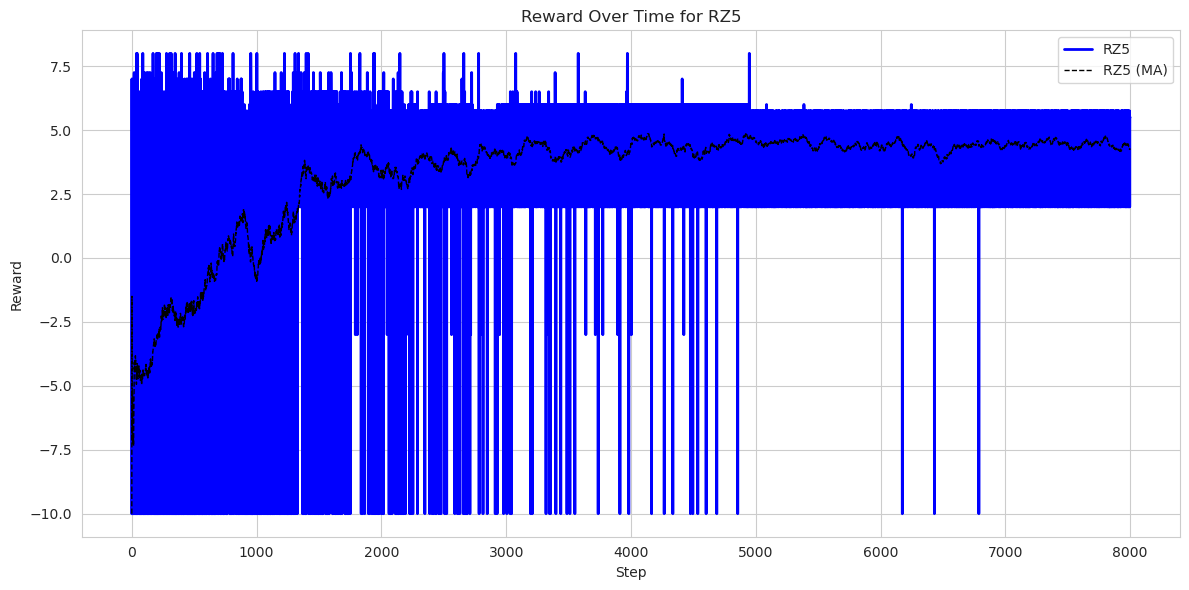

In [5]:
print("Plotting Rewards")
for agent in sim_env.agents.values():
    plots.plot_reward_for(agent.name, round_info)

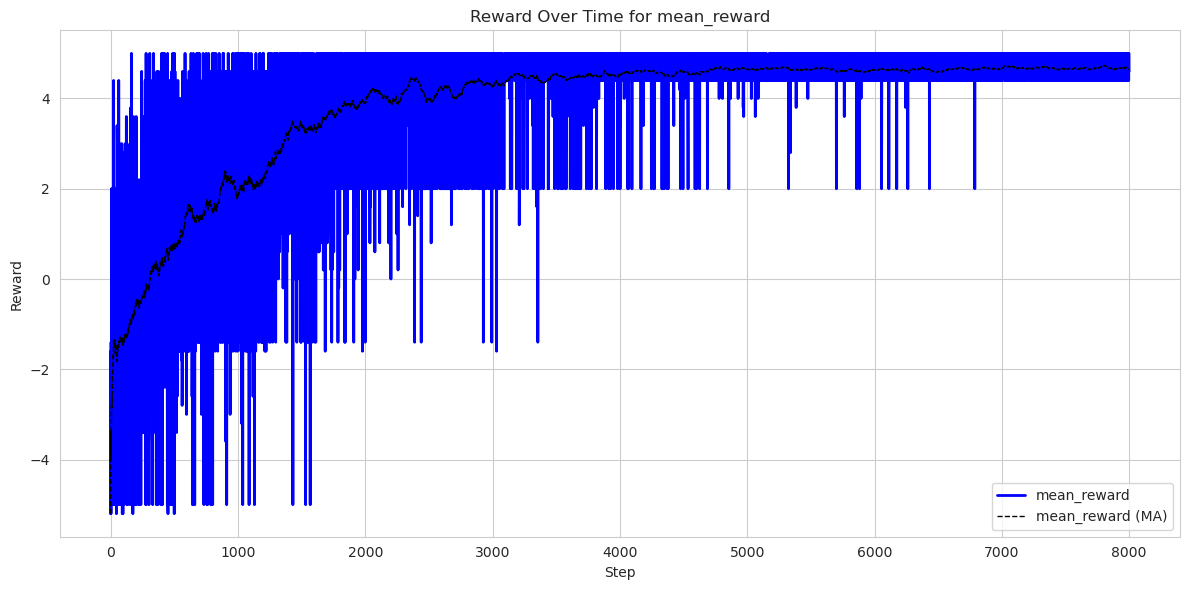

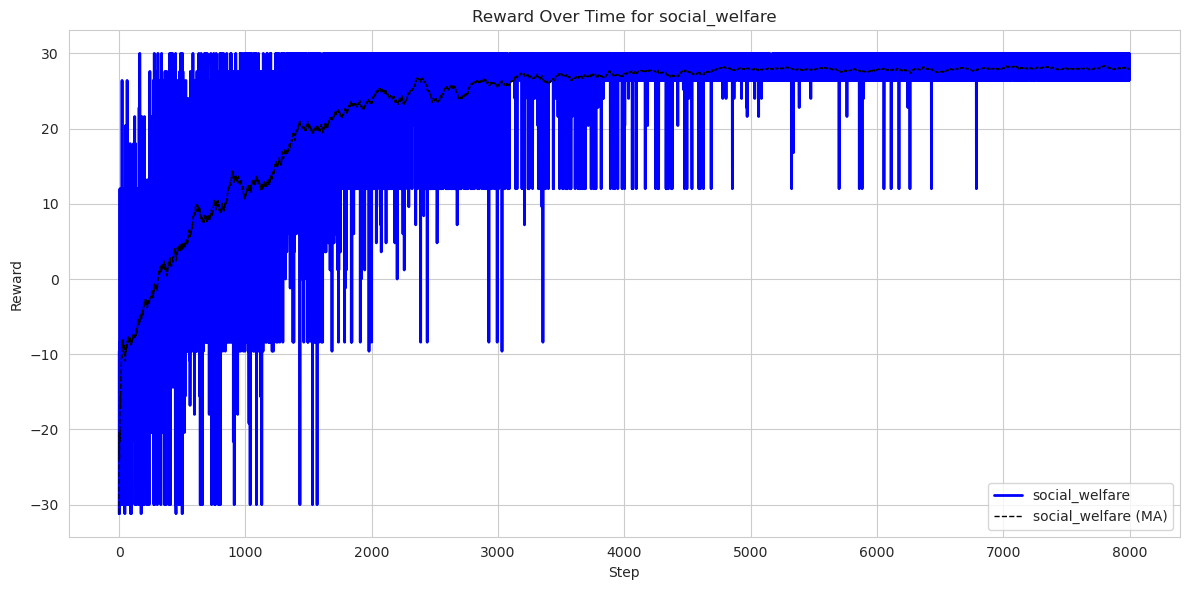

In [6]:
plots.plot_reward_for("mean_reward", round_info)
plots.plot_reward_for("social_welfare", round_info)

Plotting Cumulative Rewards


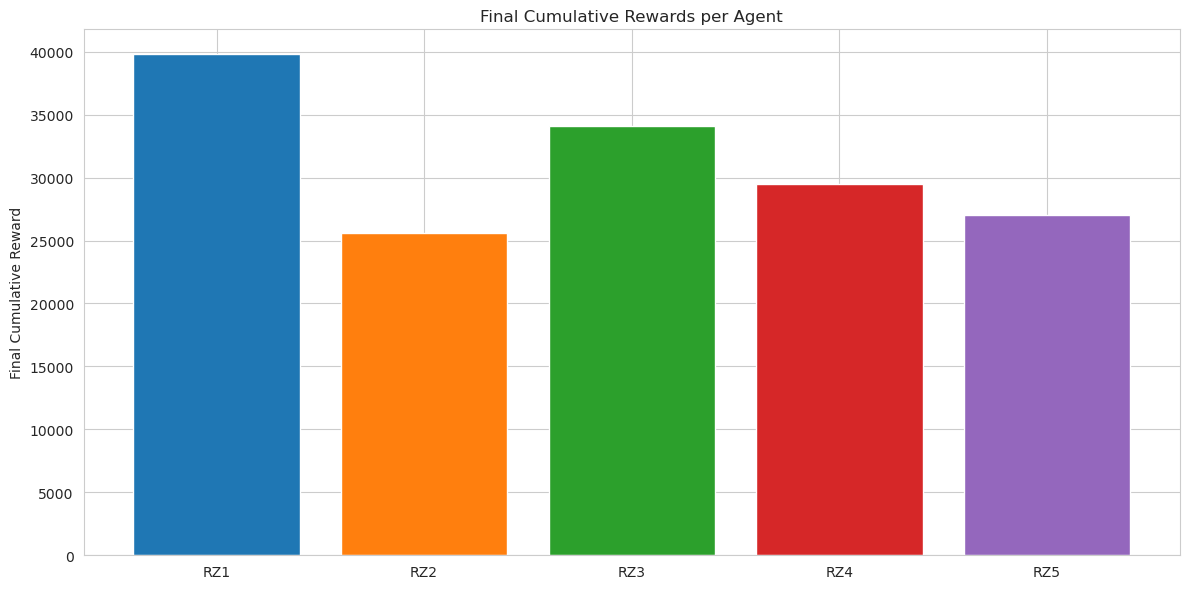

In [7]:
print("Plotting Cumulative Rewards")
plots.plot_cumulative_rewards(round_info)

Plotting Q-Table Convergance


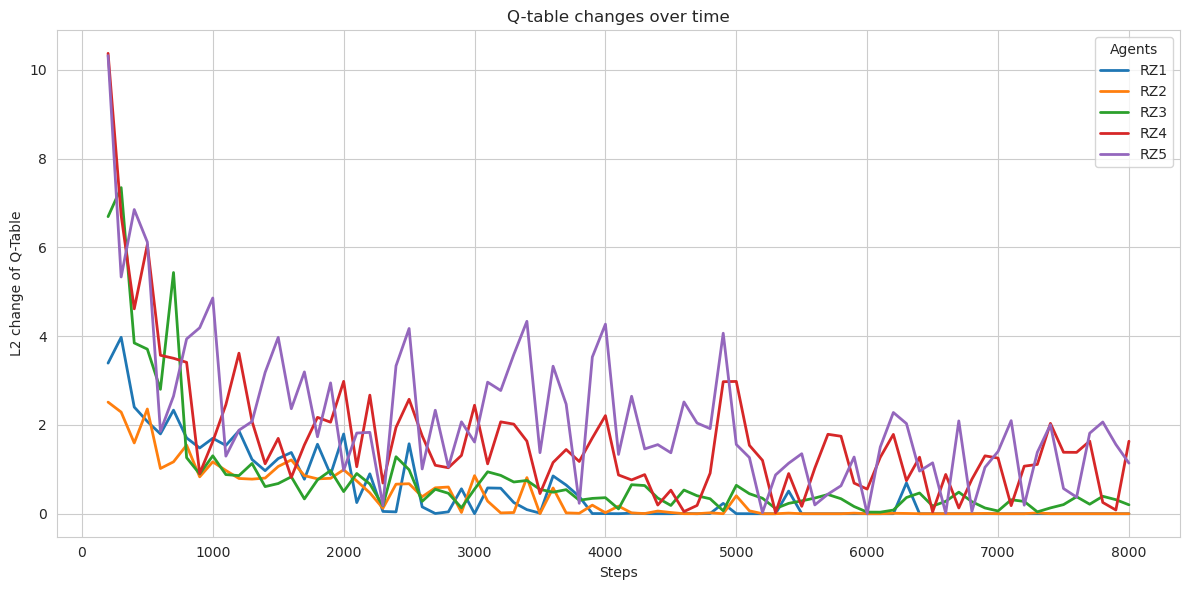

In [8]:
print("Plotting Q-Table Convergance")
plots.plot_q_convergance(q_snapshots, snap_steps)